**Name: Monika Maharjan**


**Student ID: 2409042**

#**Classification**

---



**1. Exploratory Data Analysis and Data Understanding**

In [158]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load Dataset
file_path = "/content/drive/MyDrive/WEEK2/healthcare_dataset 3.csv"
df = pd.read_csv(file_path)

# Display First Few Rows
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [10]:
# Get basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [11]:
# Display all column names
df.columns.tolist()


['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [15]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Verify if missing values are removed
df_cleaned.isnull().sum()


,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [4]:
# Display basic statistics (mean, std, min, max, etc.)
print("\nBasic Statistics of the Dataset:")
df.describe()



Basic Statistics of the Dataset:


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [13]:
# Check if there are any duplicate rows
df.duplicated().sum()


534

In [20]:
# Convert all string columns to lowercase and strip whitespaces
df_cleaned = df_cleaned.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)


In [25]:
# Encode 'Gender' column: Male -> 1, Female -> 0
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 1, 'Female': 0})

# Encode 'Test Results' column: Normal -> 1, Abnormal/Inconclusive -> 0
# Use the standardized column name 'test_results' instead of 'Test Results'
df_cleaned['Test Results'] = df_cleaned['Test Results'].map({'normal': 1, 'abnormal': 0, 'inconclusive': 0})


In [27]:
# Standardize column names by converting them to lowercase and replacing spaces with underscores
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

In [29]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['blood_type', 'medical_condition', 'doctor', 'hospital',
                    'insurance_provider', 'admission_type', 'medication']

# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for later use

# Display first few rows after cleaning
df_cleaned.head()


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,bobby jackson,30,NaN,5,2,2024-01-31,26612,34469,1,18856.281306,328,2,2024-02-02,3,1
1,leslie terry,62,NaN,0,5,2019-08-20,33648,20829,3,33643.327287,265,1,2019-08-26,1,0
2,danny smith,76,NaN,1,5,2022-09-22,37828,10300,0,27955.096079,205,1,2022-10-07,0,1
3,andrew watts,28,NaN,6,3,2020-11-18,22511,17147,3,37909.782410,450,0,2020-12-18,1,0
4,adrienne bell,43,NaN,2,2,2022-09-19,21259,38411,0,14238.317814,458,2,2022-10-09,4,0


#**Explore the data with Visualization and chart.**


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


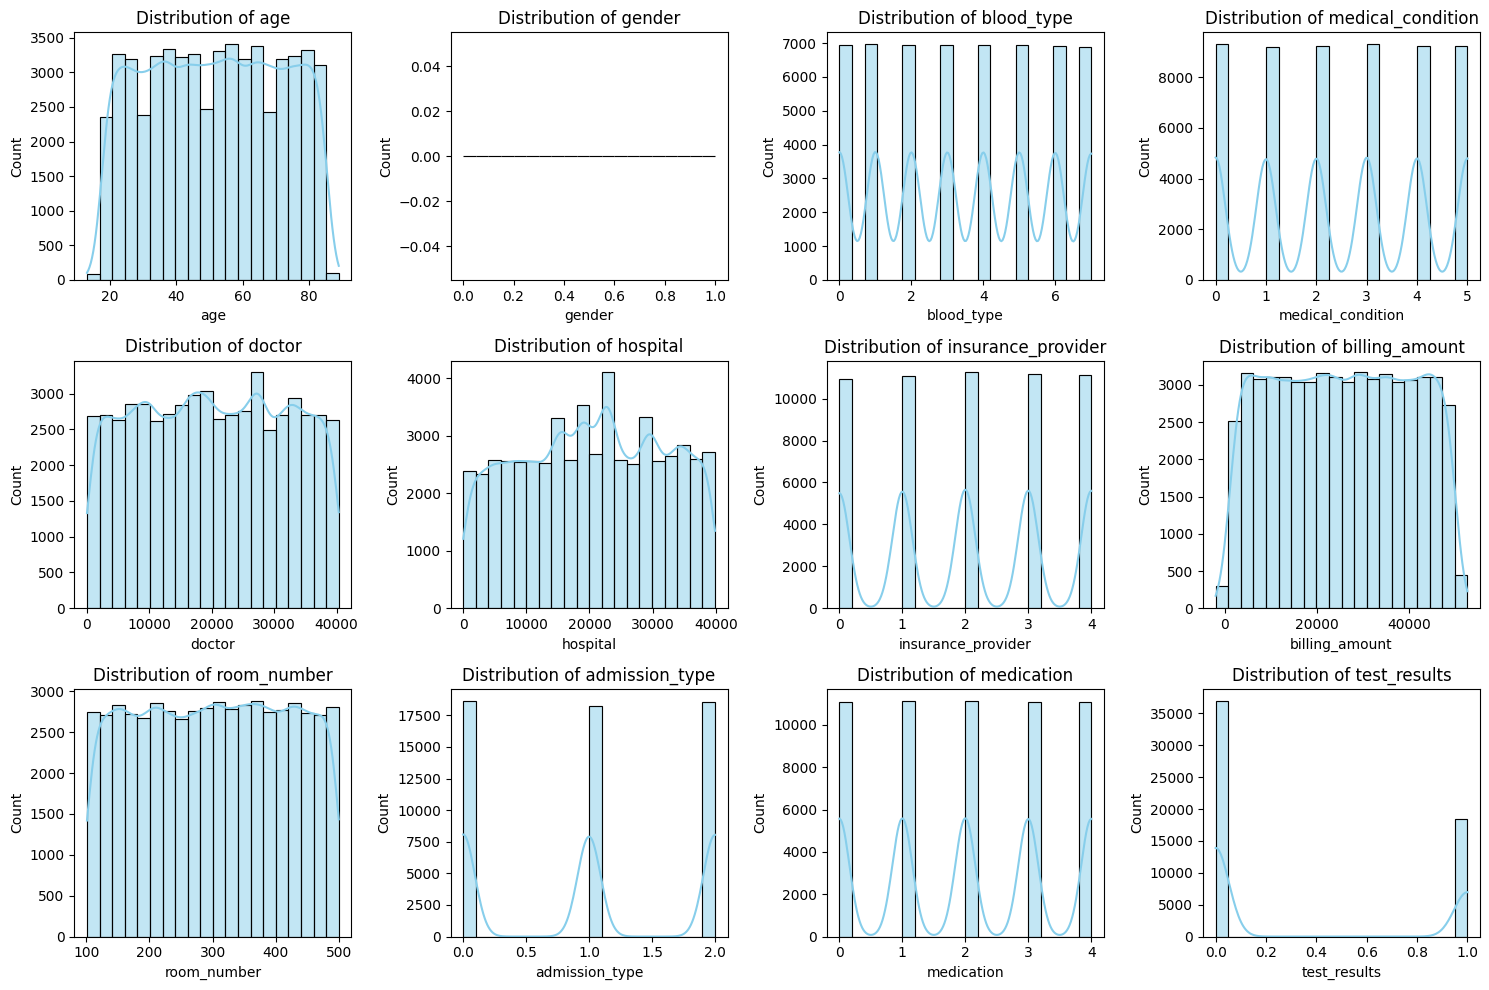

In [36]:
# Plot distribution of each feature
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_cleaned[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


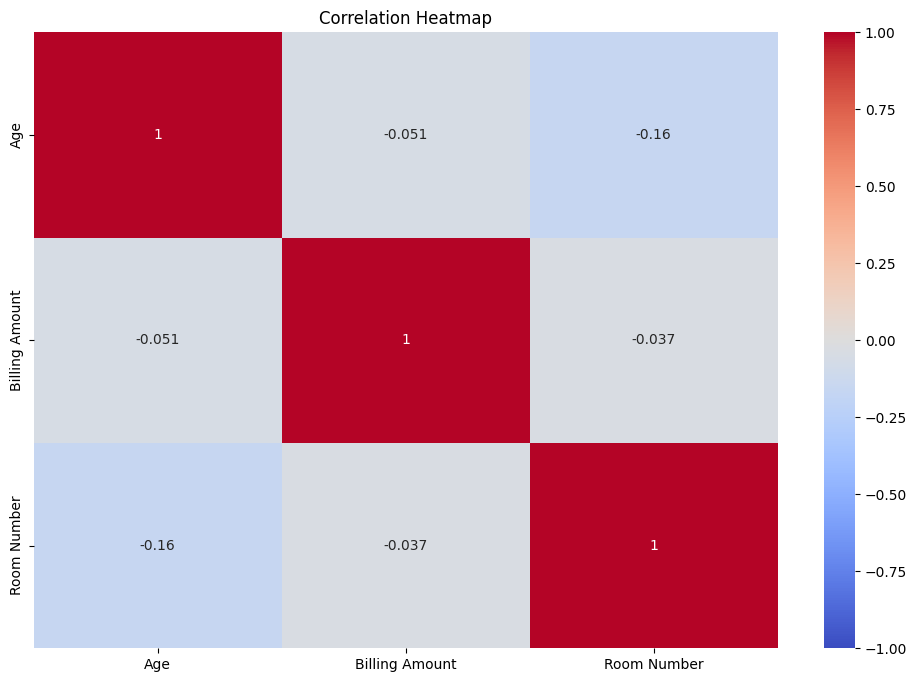

In [ ]:
# Plot correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation = numerical_df.corr()  # Compute the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # Heatmap visualization
plt.title('Correlation Heatmap')
plt.show()

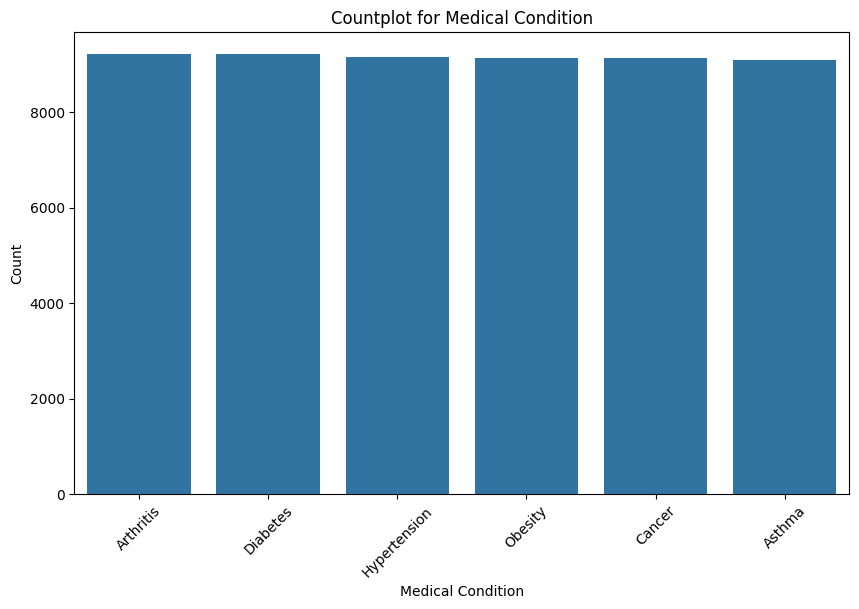

In [19]:
# Count plot to show distribution of a categorical feature (Medical Condition)
plt.figure(figsize=(10, 6))
sns.countplot(x=df_cleaned['medical_condition'], order=df_cleaned['medical_condition'].value_counts().index)
plt.title("Countplot for Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


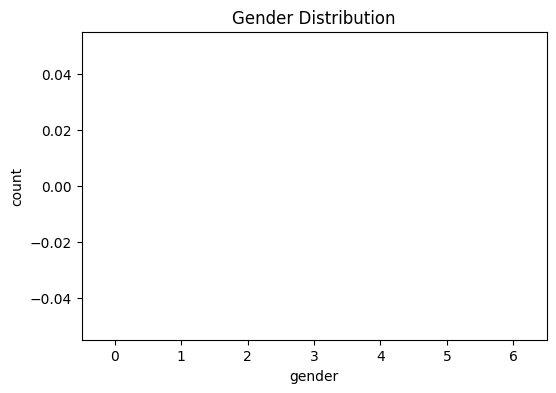

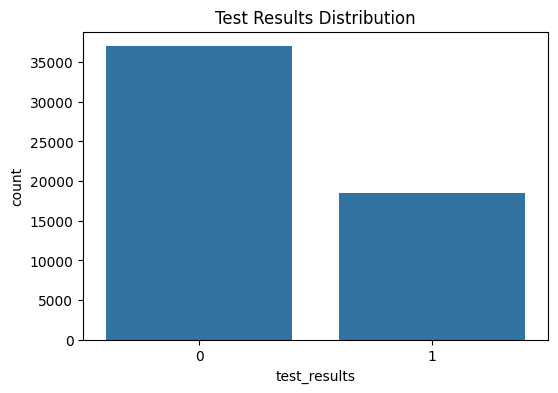

In [41]:
# Countplot for Gender (Male vs Female)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_cleaned)
plt.title("Gender Distribution")
plt.show()

# Countplot for Test Results (Normal vs Abnormal)
plt.figure(figsize=(6, 4))
sns.countplot(x='test_results', data=df_cleaned)
plt.title("Test Results Distribution")
plt.show()


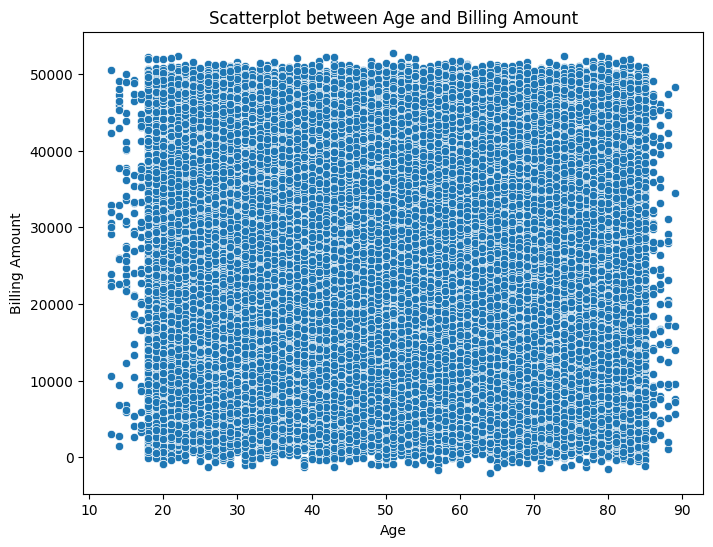

In [20]:
# Scatter plot to explore the relationship between Age and Billing Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['age'], y=df_cleaned['billing_amount'])
plt.title("Scatterplot between Age and Billing Amount")
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()


In [22]:
# Print data types of each variable
print("Data Types of Each Variable:")
print(df_cleaned.dtypes)

# Select only numerical columns from the dataset
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
print("\nNumerical Columns in the Dataset:")
print(numerical_columns)


Data Types of Each Variable:
name                   object
age                     int64
gender                 object
blood_type             object
medical_condition      object
date_of_admission      object
doctor                 object
hospital               object
insurance_provider     object
billing_amount        float64
room_number             int64
admission_type         object
discharge_date         object
medication             object
test_results           object
dtype: object

Numerical Columns in the Dataset:
Index(['age', 'billing_amount', 'room_number'], dtype='object')


In [43]:
# Print data types of each variable
print("Data Types of Each Variable:")
print(df_cleaned.dtypes)

# Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display numerical columns
numerical_cols


Data Types of Each Variable:
name                   object
age                     int64
gender                float64
blood_type              int64
medical_condition       int64
date_of_admission      object
doctor                  int64
hospital                int64
insurance_provider      int64
billing_amount        float64
room_number             int64
admission_type          int64
discharge_date         object
medication              int64
test_results            int64
dtype: object


['age',
 'gender',
 'blood_type',
 'medical_condition',
 'doctor',
 'hospital',
 'insurance_provider',
 'billing_amount',
 'room_number',
 'admission_type',
 'medication',
 'test_results']

In [53]:
# Convert numerical columns to appropriate types (if necessary)
df_cleaned['age'] = df_cleaned['age'].astype(float)

# Replace 'billing amount' with the actual column name from your DataFrame
# Assuming the column name is 'billing_amount' based on your other code snippets
df_cleaned['billing_amount'] = df_cleaned['billing_amount'].astype(float)

# Handle missing values by filling with median (if any exist)
# Select only numerical columns for median calculation
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

In [67]:
# Select features (numerical and categorical) for classification task
# Use standardized column names
X = df_cleaned[['age', 'billing_amount', 'room_number', 'gender', 'blood_type', 'medical_condition',
                'doctor', 'hospital', 'insurance_provider', 'admission_type', 'medication']]

# Target variable for classification (binary)
y = df_cleaned['test_results']

In [63]:
# Check for columns with constant values (zero variance)
constant_cols = X_train.columns[X_train.nunique() == 1]
print("Constant Columns:", constant_cols)

# Remove constant columns from the dataset
X_train = X_train.drop(columns=constant_cols)
X_test = X_test.drop(columns=constant_cols)


Constant Columns: Index([], dtype='object')


In [65]:
# Fill any remaining NaN values with column means
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [59]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Print the shape of the training and testing sets
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (44400, 11), y_train = (44400,)
Testing set shape: X_test = (11100, 11), y_test = (11100,)


In [62]:
# Assuming 'X_train' and 'X_test' have the necessary numerical columns:
# Select only the numerical columns present in X_train and X_test
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])  # Standardize numerical features
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Replace the standardized columns in X_train and X_test
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled



/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


#**2. Build a Logistic Model from Scratch**

In [68]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)


In [72]:
# Logistic Regression from Scratch
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        # Gradient Descent
        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]


In [73]:
# Train the Logistic Regression model
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train_class.values, y_train_class.values)


In [74]:
# Make predictions on the test set
y_pred_class = model.predict(X_test_class.values)

# Print a few predictions
print("\nPredictions on Test Data:", y_pred_class[:10])



Predictions on Test Data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Ensure y_pred_class and y_test_class are numpy arrays for correct shape comparison
y_pred_class = np.array(y_pred_class)
y_test_class = np.array(y_test_class)

# Calculate metrics with zero_division parameter
precision = precision_score(y_test_class, y_pred_class, zero_division=0)  # Sets precision to 0 if no predicted samples
recall = recall_score(y_test_class, y_pred_class, zero_division=0)  # Sets recall to 0 if no true positive samples
f1 = f1_score(y_test_class, y_pred_class, zero_division=0)  # Sets F1 to 0 if no positive samples
accuracy = accuracy_score(y_test_class, y_pred_class)

# Print the metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)



Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 1.0


#**3. Build a Primary Model**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features for both models
scaler = StandardScaler()

# Standardize the training and testing features for both models
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # import imputer

# Standardize the features for both models
scaler = StandardScaler()

# Standardize the training and testing features for both models
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the imputer with the strategy to fill NaNs with the mean
imputer = SimpleImputer(strategy='mean') # initialize

# Fit and transform the training data, transform the test data
X_train_scaled = imputer.fit_transform(X_train_scaled) # impute
X_test_scaled = imputer.transform(X_test_scaled) # impute
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [143]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_clf.predict(X_test_scaled)


In [144]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluation function
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, f1, accuracy


In [145]:
# Evaluate Logistic Regression Model
precision_log_reg, recall_log_reg, f1_log_reg, accuracy_log_reg = evaluate_model(y_test, y_pred_log_reg)

# Evaluate Random Forest Model
precision_rf, recall_rf, f1_rf, accuracy_rf = evaluate_model(y_test, y_pred_rf)

# Print evaluation metrics for both models
print("Logistic Regression Evaluation:")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")
print(f"Accuracy: {accuracy_log_reg:.4f}\n")

print("Random Forest Evaluation:")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")


Logistic Regression Evaluation:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Accuracy: 0.6641

Random Forest Evaluation:
Precision: 0.8462
Recall: 0.1740
F1 Score: 0.2887
Accuracy: 0.7119


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [146]:
# Compare models based on accuracy
if accuracy_log_reg > accuracy_rf:
    print("\nLogistic Regression performed better.")
else:
    print("\nRandom Forest Classifier performed better.")



Random Forest Classifier performed better.


**4. Hyper-parameter Optimization with Cross-Validation**

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Model 1 - Logistic Regression Hyperparameter Tuning

# Define the hyperparameters to tune for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Perform Grid Search with Cross-Validation for Logistic Regression
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train_scaled, y_train)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)

# Cross-validation score for Logistic Regression with best parameters
log_reg_cv_score = cross_val_score(grid_search_log_reg.best_estimator_, X_train_scaled, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv_score.mean():.4f}")


Best Hyperparameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Cross-Validation Accuracy: 0.6669


In [150]:
from sklearn.ensemble import RandomForestClassifier

# Model 2 - Random Forest Hyperparameter Tuning

# Define the hyperparameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider for each split
    'bootstrap': [True]
}
# Initialize Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation for Random Forest
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Cross-validation score for Random Forest with best parameters
rf_cv_score = cross_val_score(grid_search_rf.best_estimator_, X_train_scaled, y_train, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_score.mean():.4f}")


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Cross-Validation Accuracy: 0.6665


In [151]:
# Compare both models' cross-validation accuracies
log_reg_best_cv_score = log_reg_cv_score.mean()
rf_best_cv_score = rf_cv_score.mean()

print("\nComparison of Models:")
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_best_cv_score:.4f}")
print(f"Random Forest Cross-Validation Accuracy: {rf_best_cv_score:.4f}")

# Identify the best model
if log_reg_best_cv_score > rf_best_cv_score:
    print("\nLogistic Regression performed better after Hyperparameter Tuning.")
else:
    print("\nRandom Forest Classifier performed better after Hyperparameter Tuning.")



Comparison of Models:
Logistic Regression Cross-Validation Accuracy: 0.6669
Random Forest Cross-Validation Accuracy: 0.6665

Logistic Regression performed better after Hyperparameter Tuning.


**5. Feature Selection**

In [153]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature Selection for Logistic Regression

# Select the best 5 features based on the f_classif scoring function
select_k_best_log_reg = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected_log_reg = select_k_best_log_reg.fit_transform(X_train_scaled, y_train)
X_test_selected_log_reg = select_k_best_log_reg.transform(X_test_scaled)

# Print the selected features' indices and the feature scores
print("Selected Features for Logistic Regression:")
selected_features_log_reg = select_k_best_log_reg.get_support(indices=True)
print("Feature indices:", selected_features_log_reg)
print("Feature scores:", select_k_best_log_reg.scores_)

# Train a Logistic Regression model on the selected features
log_reg_selected = LogisticRegression(random_state=42)
log_reg_selected.fit(X_train_selected_log_reg, y_train)

# Evaluate the model
y_pred_log_reg_selected = log_reg_selected.predict(X_test_selected_log_reg)
accuracy_log_reg_selected = accuracy_score(y_test, y_pred_log_reg_selected)
print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")


Selected Features for Logistic Regression:
Feature indices: [0 1 5 6 7]
Feature scores: [3.65046643 0.92611627 0.52746002 0.2370064  0.10298451 1.47979141
 4.56388024 0.55782403 0.00534557 0.20338807]
Logistic Regression with selected features Accuracy: 0.6641


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection for Random Forest Classifier

# Select the best 5 features based on the f_classif scoring function
select_k_best_rf = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected_rf = select_k_best_rf.fit_transform(X_train_scaled, y_train)
X_test_selected_rf = select_k_best_rf.transform(X_test_scaled)

# Print the selected features' indices and the feature scores
print("Selected Features for Random Forest Classifier:")
selected_features_rf = select_k_best_rf.get_support(indices=True)
print("Feature indices:", selected_features_rf)
print("Feature scores:", select_k_best_rf.scores_)

# Train a Random Forest model on the selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected_rf, y_train)

# Evaluate the model
y_pred_rf_selected = rf_selected.predict(X_test_selected_rf)
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
print(f"Random Forest with selected features Accuracy: {accuracy_rf_selected:.4f}")


Selected Features for Random Forest Classifier:
Feature indices: [0 1 5 6 7]
Feature scores: [3.65046643 0.92611627 0.52746002 0.2370064  0.10298451 1.47979141
 4.56388024 0.55782403 0.00534557 0.20338807]
Random Forest with selected features Accuracy: 0.6907


**Final Model**

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Use the best hyperparameters from GridSearchCV (Assuming Logistic Regression was chosen)
best_params_log_reg = {'C': 0.1, 'solver': 'liblinear'}  # Example best params found

# Step 2: Train Logistic Regression with the best hyperparameters
log_reg_final = LogisticRegression(C=best_params_log_reg['C'], solver=best_params_log_reg['solver'])

# Step 3: Use the top selected features (from SelectKBest)
# Selecting the best features using the indices from SelectKBest
X_train_selected_log_reg = X_train_scaled[:, select_k_best_log_reg.get_support(indices=True)]
X_test_selected_log_reg = X_test_scaled[:, select_k_best_log_reg.get_support(indices=True)]

# Step 4: Train the Logistic Regression model on the selected features
log_reg_final.fit(X_train_selected_log_reg, y_train)

# Step 5: Evaluate the model
y_pred_log_reg_final = log_reg_final.predict(X_test_selected_log_reg)
accuracy_log_reg_final = accuracy_score(y_test, y_pred_log_reg_final)

# Step 6: Compare with previous performance
print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")
print(f"Final Logistic Regression Accuracy: {accuracy_log_reg_final:.4f}")

# Step 7: Did the performance improve?
if accuracy_log_reg_final > accuracy_log_reg_selected:
    print("Model performance improved after using the best hyperparameters and selected features.")
else:
    print("Model performance did not improve after using the best hyperparameters and selected features.")


Logistic Regression with selected features Accuracy: 0.6641
Final Logistic Regression Accuracy: 0.6641
Model performance did not improve after using the best hyperparameters and selected features.
